In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings;
warnings.simplefilter('ignore')

In [ ]:
df=pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
# checking for missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# checking for Null values if any!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c328d3850>,
      dtype=object)

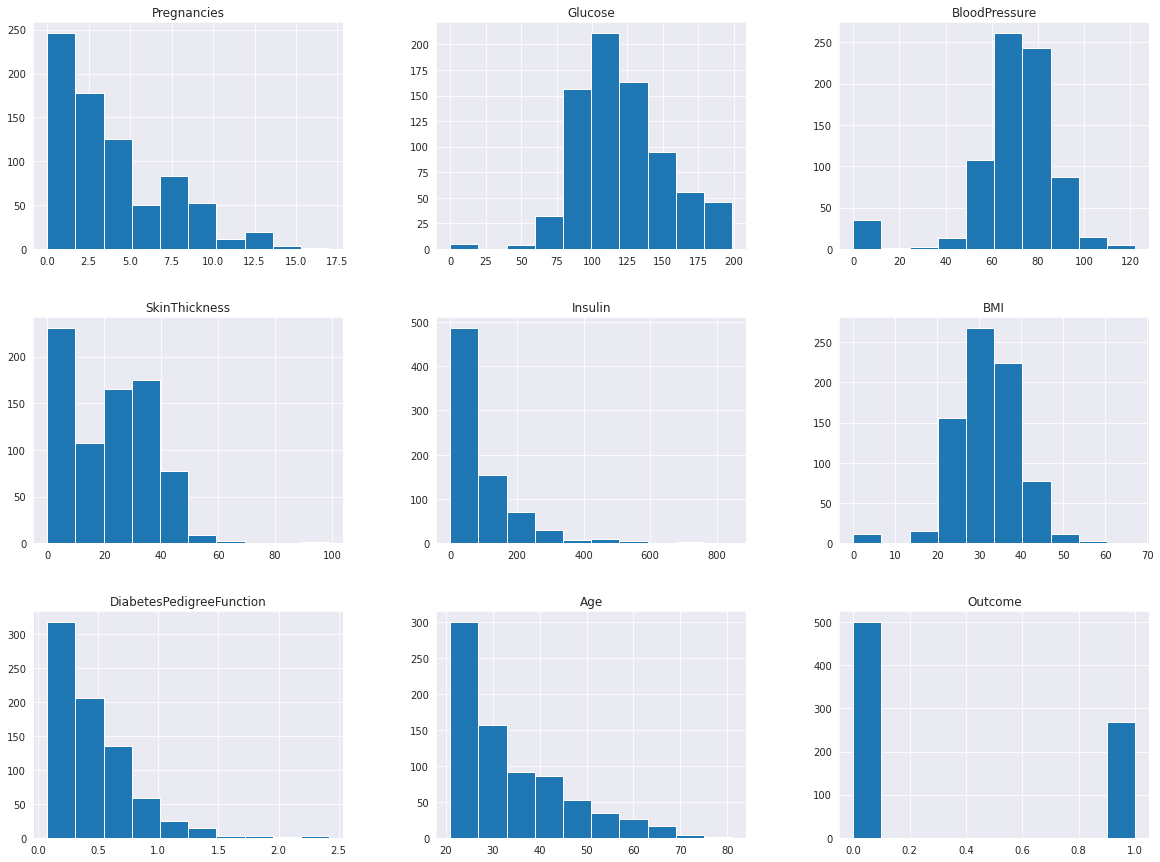

In [ ]:
df.hist(figsize=(20,15))

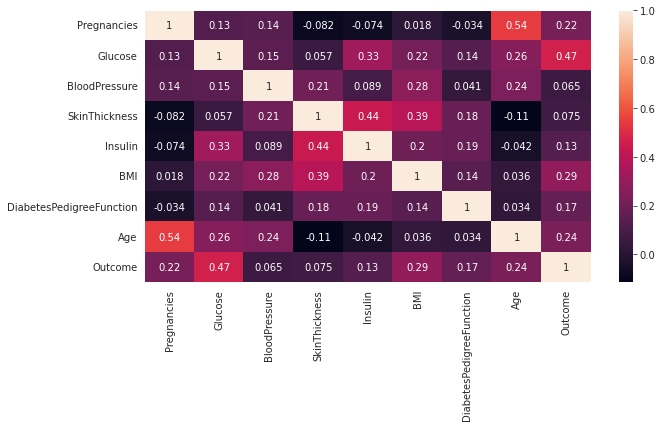

In [ ]:
plt.figure(1 , figsize = (10, 5))
cor = sns.heatmap(df.corr(), annot = True)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

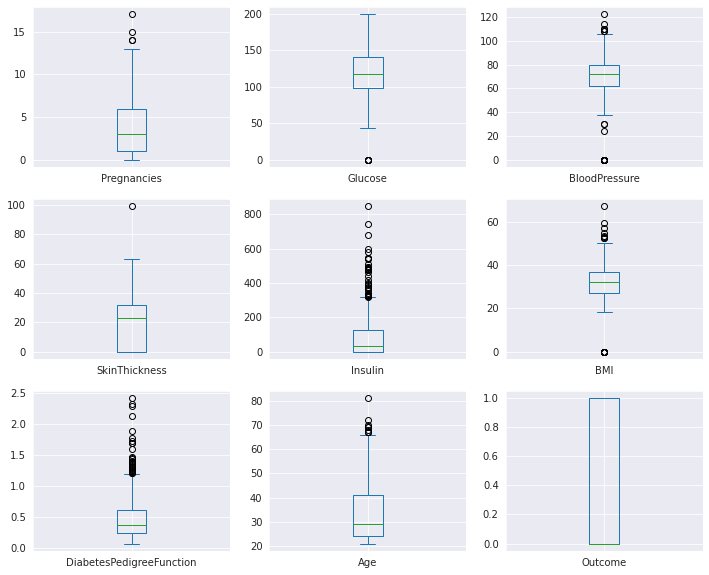

In [ ]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

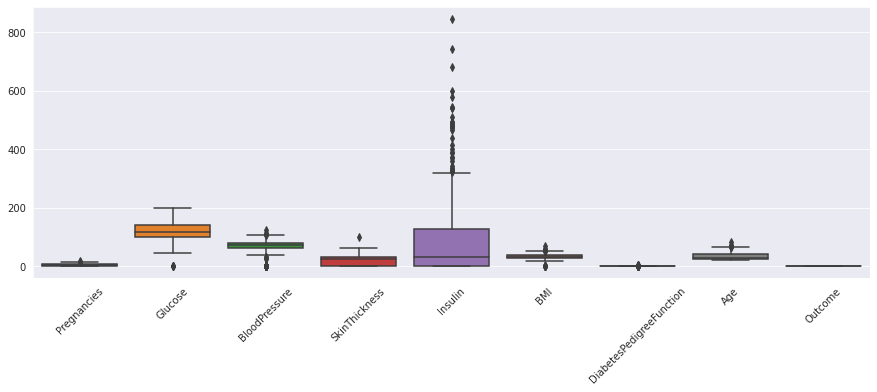

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(15,5));
sns.boxplot(data=df);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=45);
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

In [ ]:
Q1=df['BMI'].quantile(0.25)                         #using IQR method
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lr = Q1-(1.5*IQR)
Ur = Q3+(1.5*IQR)
print(Lr, Ur)

27.3
36.6
9.3
13.35 50.550000000000004


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df1= df

In [ ]:
df1.shape

(768, 9)

In [ ]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
num_list = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose']
def outlier_count(col, data=df1):
    print("For "+col)
    
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Outlier Count: {}'.format(outlier_count))
    print('Outlier percentage of data: {}%'.format(outlier_percent))
    print("-"*30)
for col in num_list:
    outlier_count(col)

For Pregnancies
Outlier Count: 4
Outlier percentage of data: 0.52%
------------------------------
For Insulin
Outlier Count: 34
Outlier percentage of data: 4.43%
------------------------------
For BMI
Outlier Count: 19
Outlier percentage of data: 2.47%
------------------------------
For DiabetesPedigreeFunction
Outlier Count: 29
Outlier percentage of data: 3.78%
------------------------------
For Age
Outlier Count: 9
Outlier percentage of data: 1.17%
------------------------------
For Glucose
Outlier Count: 5
Outlier percentage of data: 0.65%
------------------------------


In [ ]:
features_with_outliers = ['Pregnancies', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)#the median of the lower half 
    q3 = df1[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

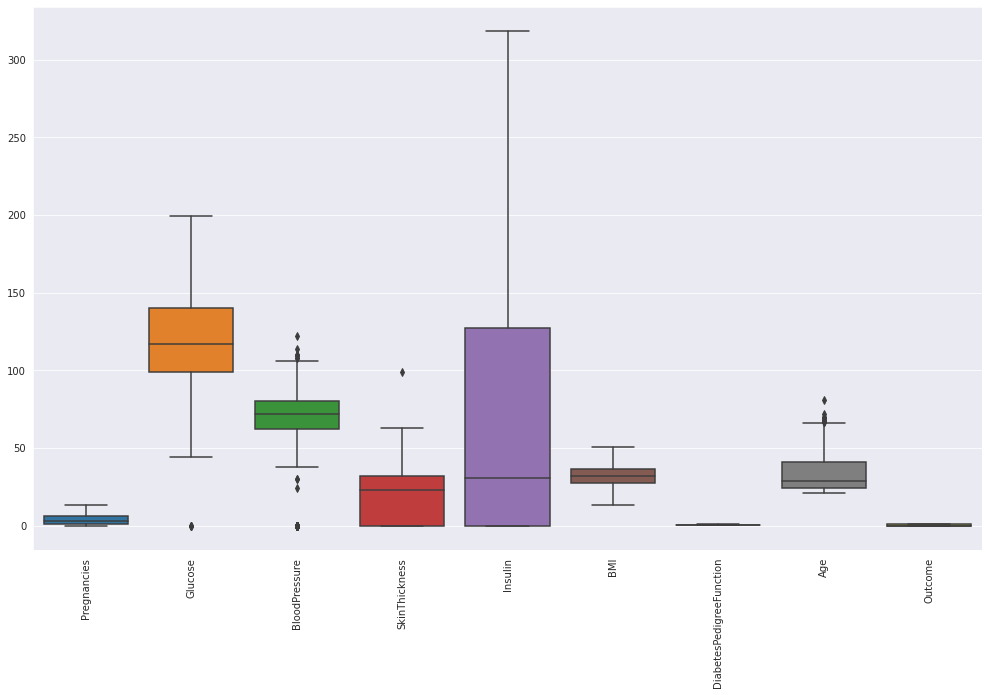

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(17,10));
sns.boxplot(data=df1);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=90);

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

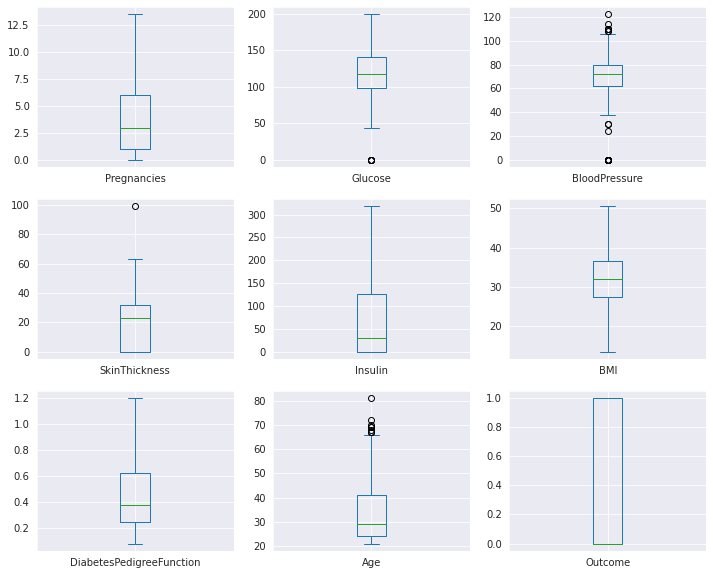

In [ ]:
df1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

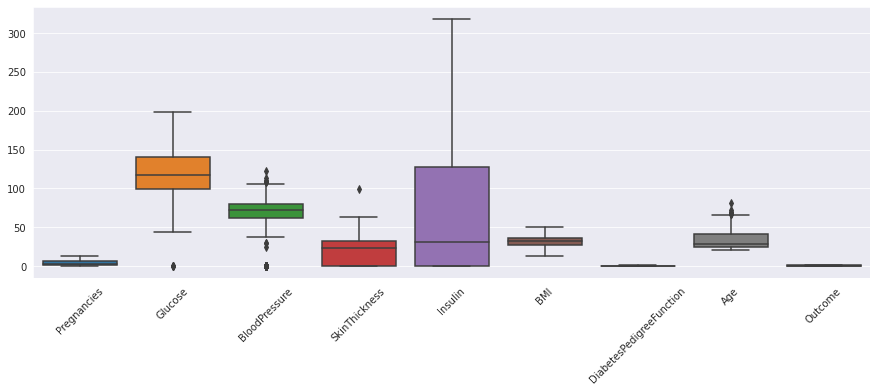

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(15,5));
sns.boxplot(data=df1);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=45);

In [ ]:
df1.shape

(768, 9)

In [ ]:
features_with_outliers = ['Age', 'BloodPressure']
for feature in features_with_outliers:
    q1 = df1[feature].quantile(0.25)#the median of the lower half 
    q3 = df1[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df1.loc[df1[feature]<lower_limit,feature] = lower_limit
    df1.loc[df1[feature]>upper_limit,feature] = upper_limit

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

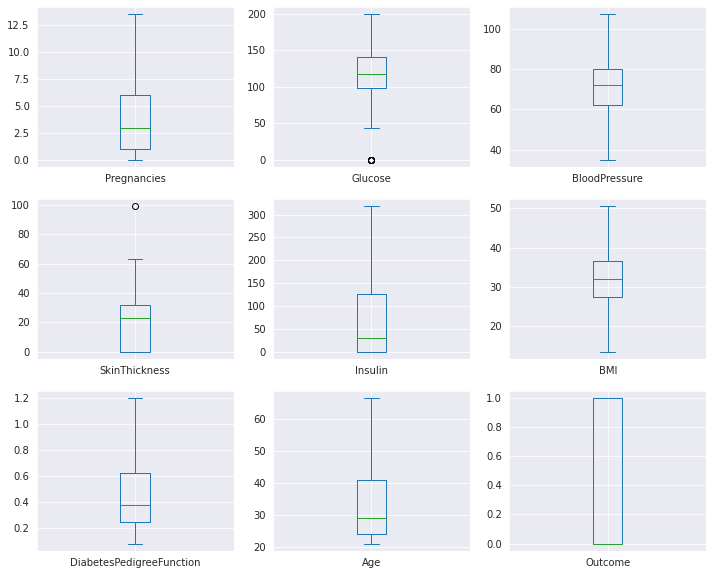

In [ ]:
df1.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,10))

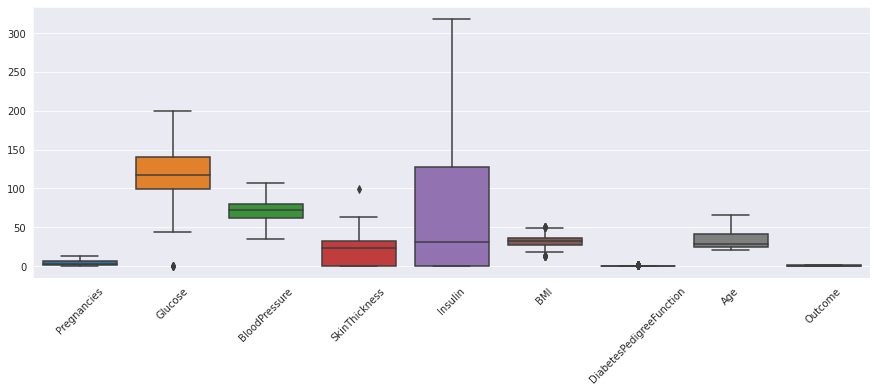

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(15,5));
sns.boxplot(data=df1);
#sns.violinplot(data=df_out);
#sns.stripplot(data=df_out);
plt.xticks(rotation=45);

In [ ]:
df1.shape

(768, 9)

In [ ]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
target=df1['Outcome']
feature = df1.drop('Outcome', axis=1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [ ]:
df1 = df1.astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int64
 6   DiabetesPedigreeFunction  768 non-null    int64
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int64(9)
memory usage: 54.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature,target, test_size = 0.20,random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35,0.0,33.6,0.627,50.0
1,1.0,85,66,29,0.0,26.6,0.351,31.0
2,8.0,183,64,0,0.0,23.3,0.672,32.0
3,1.0,89,66,23,94.0,28.1,0.167,21.0
4,0.0,137,40,35,168.0,43.1,1.200,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180.0,32.9,0.171,63.0
764,2.0,122,70,27,0.0,36.8,0.340,27.0
765,5.0,121,72,23,112.0,26.2,0.245,30.0
766,1.0,126,60,0,0.0,30.1,0.349,47.0


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 150)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.6336
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6401
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6401
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6401
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6401
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6602 - accuracy: 0.6401
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.6401
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6401
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6401
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6425 - accuracy: 0.6401
Epoch 11/

In [ ]:
y_pred = classifier.predict(X_test)

5/5 [==============================] - 0s 3ms/step


accuracy of the model:  0.7012987012987013


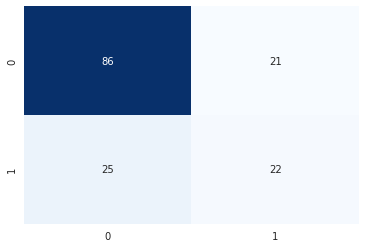

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round() ))
     

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       107
           1       0.51      0.47      0.49        47

    accuracy                           0.70       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.69      0.70      0.70       154

